<a href="https://colab.research.google.com/github/LikeMattorSomething/FutureTalentsProjects/blob/main/GraceDataMLTests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Seperating data into test and train

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



GraceData = pd.read_csv("/content/drive/MyDrive/Future Talents Data/Grace_All years combined 08-07-2025.csv")

GraceData = GraceData[GraceData['Diabetes'] != '#NULL!']#Removed bad data with no diabetes

X = GraceData.drop(columns=["Diabetes","Country","seriali"])#Countries causes errors due to it being a string
y = GraceData["Diabetes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.shape
X_test.shape

(1553, 50)

# Finding the most accurate amount of neightbours with Nearest Neighbour.

In [2]:
score = 0
TopKNeighborsClassifierAmount = ""

for KNeighborsClassifierAmount in range(1,30):


  knnc = KNeighborsClassifier(int(KNeighborsClassifierAmount),weights="distance")
  knnc.fit(X_train, y_train)



  if knnc.score(X_test, y_test) > score:
    score = knnc.score(X_test, y_test)
    TopKNeighborsClassifierAmount = KNeighborsClassifierAmount


  print(KNeighborsClassifierAmount)
  print(knnc.score(X_test, y_test))

print("Top Scores")
print(TopKNeighborsClassifierAmount)
print(score)

1
0.652929813264649
2
0.652929813264649
3
0.686413393432067
4
0.6922086284610431
5
0.708950418544752
6
0.7160334835801674
7
0.7198969735994849
8
0.7186091435930457
9
0.7134578235672892
10
0.7218287186091435
11
0.7147456535737282
12
0.7295556986477785
13
0.7141017385705087
14
0.7218287186091435
15
0.7134578235672892
16
0.7160334835801674
17
0.7179652285898261
18
0.7186091435930457
19
0.7141017385705087
20
0.7192530585962653
21
0.7108821635544108
22
0.7141017385705087
23
0.7115260785576304
24
0.7134578235672892
25
0.7141017385705087
26
0.7179652285898261
27
0.716677398583387
28
0.7128139085640696
29
0.7115260785576304
Top Scores
12
0.7295556986477785


# Finding the most accurate amount of neightbours with Decision Tree.

None
0.8802318094011591
1
0.8789439793947199
2
0.9143593045717965
3
0.9130714745653574
4
0.9124275595621378
5
0.9111397295556987
6
0.9008370895041854
7
0.8873148744365744
8
0.8943979394719896
9
0.8879587894397939
10
0.8898905344494527
11
0.8879587894397939
12
0.8828074694140373
13
0.8873148744365744
14
0.8705730843528654
15
0.8789439793947199
16
0.8725048293625242
17
0.875724404378622
18
0.8725048293625242
19
0.8795878943979395
20
0.8795878943979395
21
0.8705730843528654
22
0.8725048293625242
23
0.8737926593689633
24
0.8776561493882807
25
0.8737926593689633
26
0.8763683193818416
27
0.8718609143593046
28
0.8808757244043787
29
0.8705730843528654
Top Scores
2
0.9143593045717965


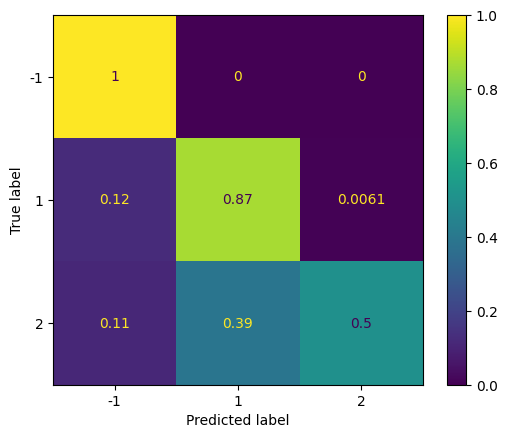

In [35]:
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

score = 0
TopTreeDepth = ""

for TreeDepth in range(0,30):

  if TreeDepth == 0:
    TreeDepth = None

  desisionTreeClassifier = tree.DecisionTreeClassifier(max_depth=TreeDepth)
  desisionTreeClassifier = desisionTreeClassifier.fit(X_train, y_train)

  desisionTreeClassifier.fit(X_train, y_train)

  #tree.plot_tree(desisionTreeClassifier)
  print(TreeDepth)
  print(desisionTreeClassifier.score(X_test, y_test))

  if desisionTreeClassifier.score(X_test, y_test) > score:
    score = desisionTreeClassifier.score(X_test, y_test)
    TopTreeDepth = TreeDepth

print("Top Scores")
print(TopTreeDepth)
print(score)

desisionTreeClassifier = tree.DecisionTreeClassifier(max_depth=TopTreeDepth)
desisionTreeClassifier = desisionTreeClassifier.fit(X_train, y_train)


PredictedResults = desisionTreeClassifier.predict(X_test)
ActualResults = y_test

confusion_matrix(ActualResults, PredictedResults)
ConfusionMatrixDisplay.from_estimator(desisionTreeClassifier, X_test, y_test,normalize="true")

# Evaluating accuracy

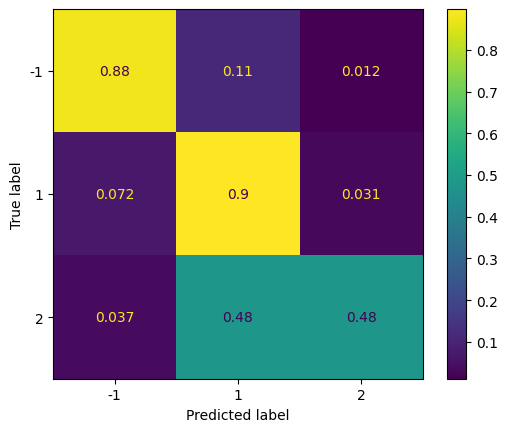

In [34]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

knnc = KNeighborsClassifier(int(12),weights="distance")
knnc.fit(X_train, y_train)

PredictedResults = desisionTreeClassifier.predict(X_test)
ActualResults = y_test

confusion_matrix(ActualResults, PredictedResults)
#ConfusionMatrixDisplay.from_estimator(knnc, X_test, y_test)
ConfusionMatrixDisplay.from_estimator(desisionTreeClassifier, X_test, y_test,normalize="true")